In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import os

# Reading and Understanding the data

In [3]:
dfhousing = pd.read_csv('train.csv')
dfhousing.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [4]:
dfhousing.shape

(1460, 81)

In [5]:
dfhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
dfhousing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
dfhousing.describe(percentiles = [0.05,0.10,0.25,0.50,0.75,0.90,0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
5%,73.950000,20.000000,34.000000,3311.700000,4.000000,4.000000,1916.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,519.300000,672.950000,0.000000,0.000000,848.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,4.000000,0.000000,1930.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2006.000000,88000.000000
10%,146.900000,20.000000,44.000000,5000.000000,5.000000,5.000000,1924.900000,1950.000000,0.000000,0.000000,0.000000,74.900000,636.900000,756.900000,0.000000,0.000000,912.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1945.000000,1.000000,240.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2006.000000,106475.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,96.000000,14381.700000,8.000000,7.000

In [8]:
dfhousing['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

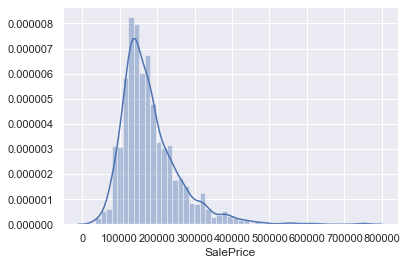

In [9]:
sns.distplot(dfhousing['SalePrice'])

SalePrice shows positive skewness

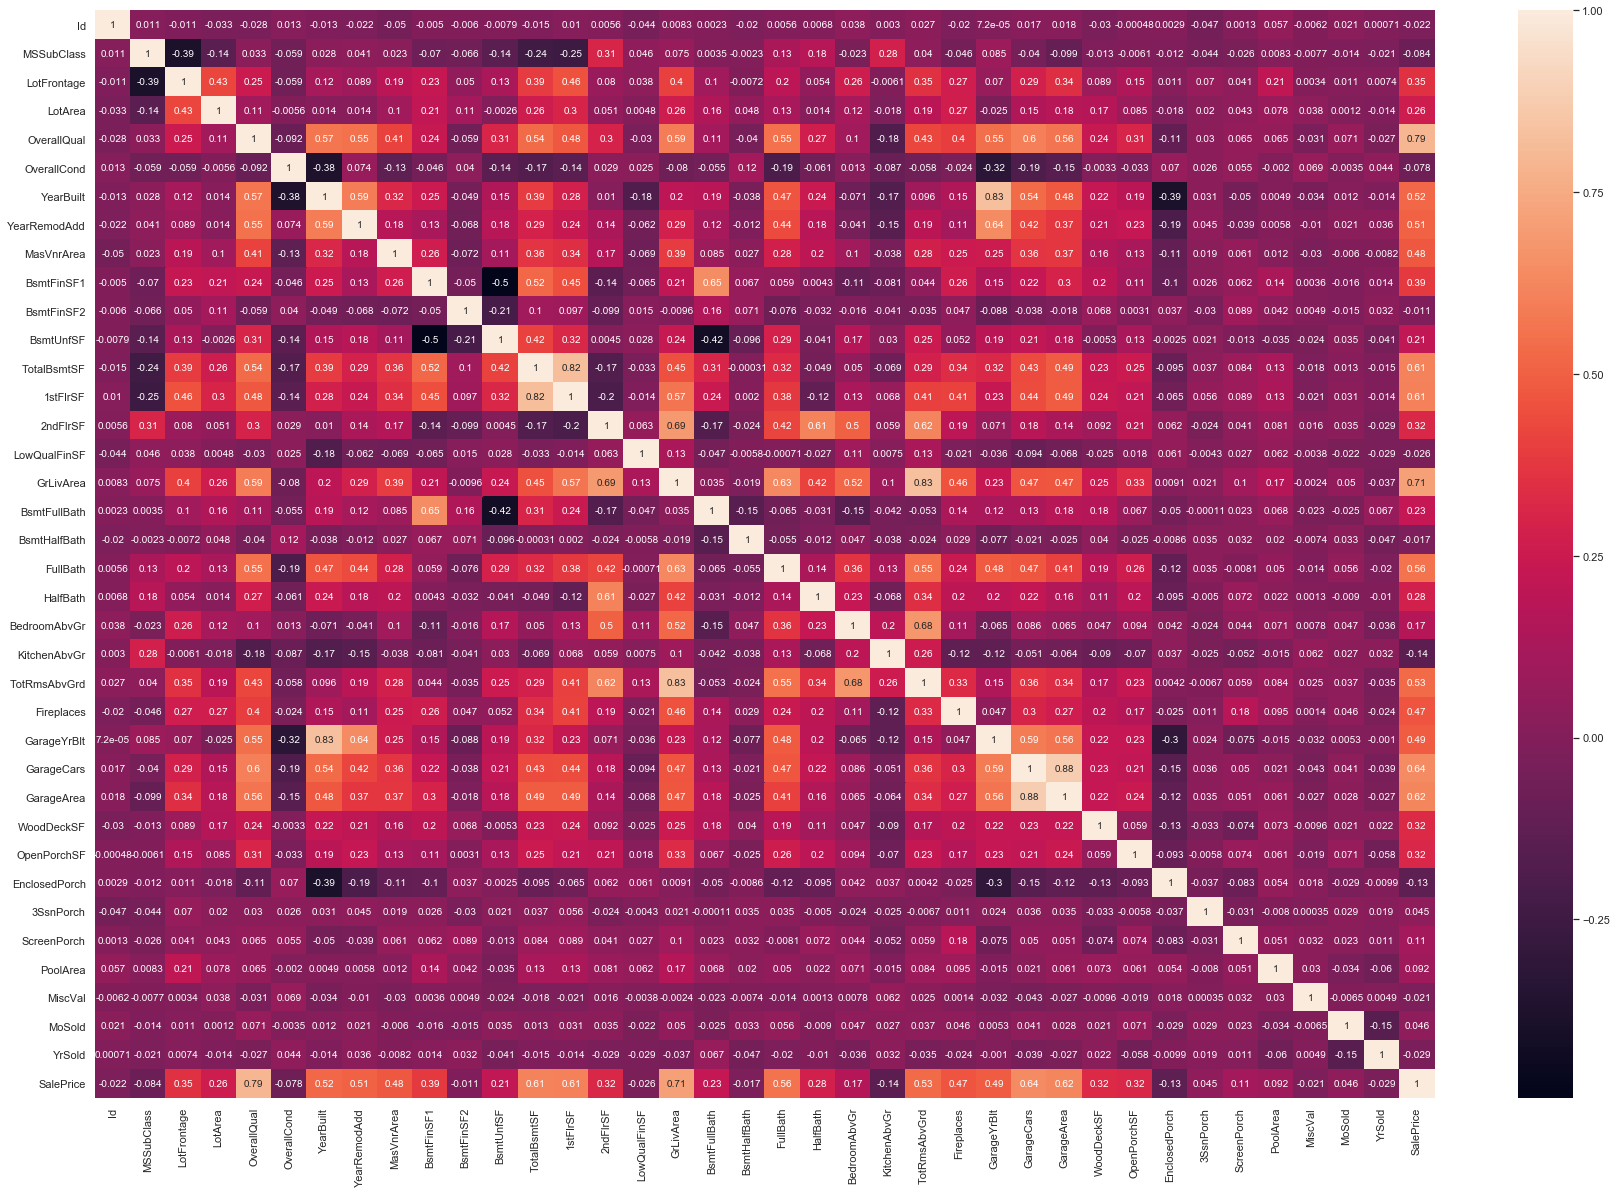

In [10]:
plt.figure(figsize=(30,20))
corhouse = dfhousing.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corhouse,annot = True)
plt.show()

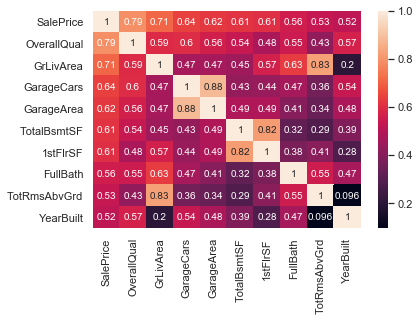

In [11]:
k = 10
cols = corhouse.nlargest(k, 'SalePrice')['SalePrice'].index
top = np.corrcoef(dfhousing[cols].values.T)
sns.heatmap(top, annot = True, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

1. GarageArea and GarageCars are highly correlated with a correlation of 0.88
2. 1stFlrSF and TotalBsmtSF are highly correlated with a correlation of 0.82
3. The variables with a high correlation with Sale Price : OverallQual,GrLivArea, GarageArea, TotBsmtSF, 1stFlrSF,TotalRmsAbvGrd,FullBath and YearBuilt
4. TotRmsAbvGrd and GrLivArea are correlated to each other with a correlation of 0.83

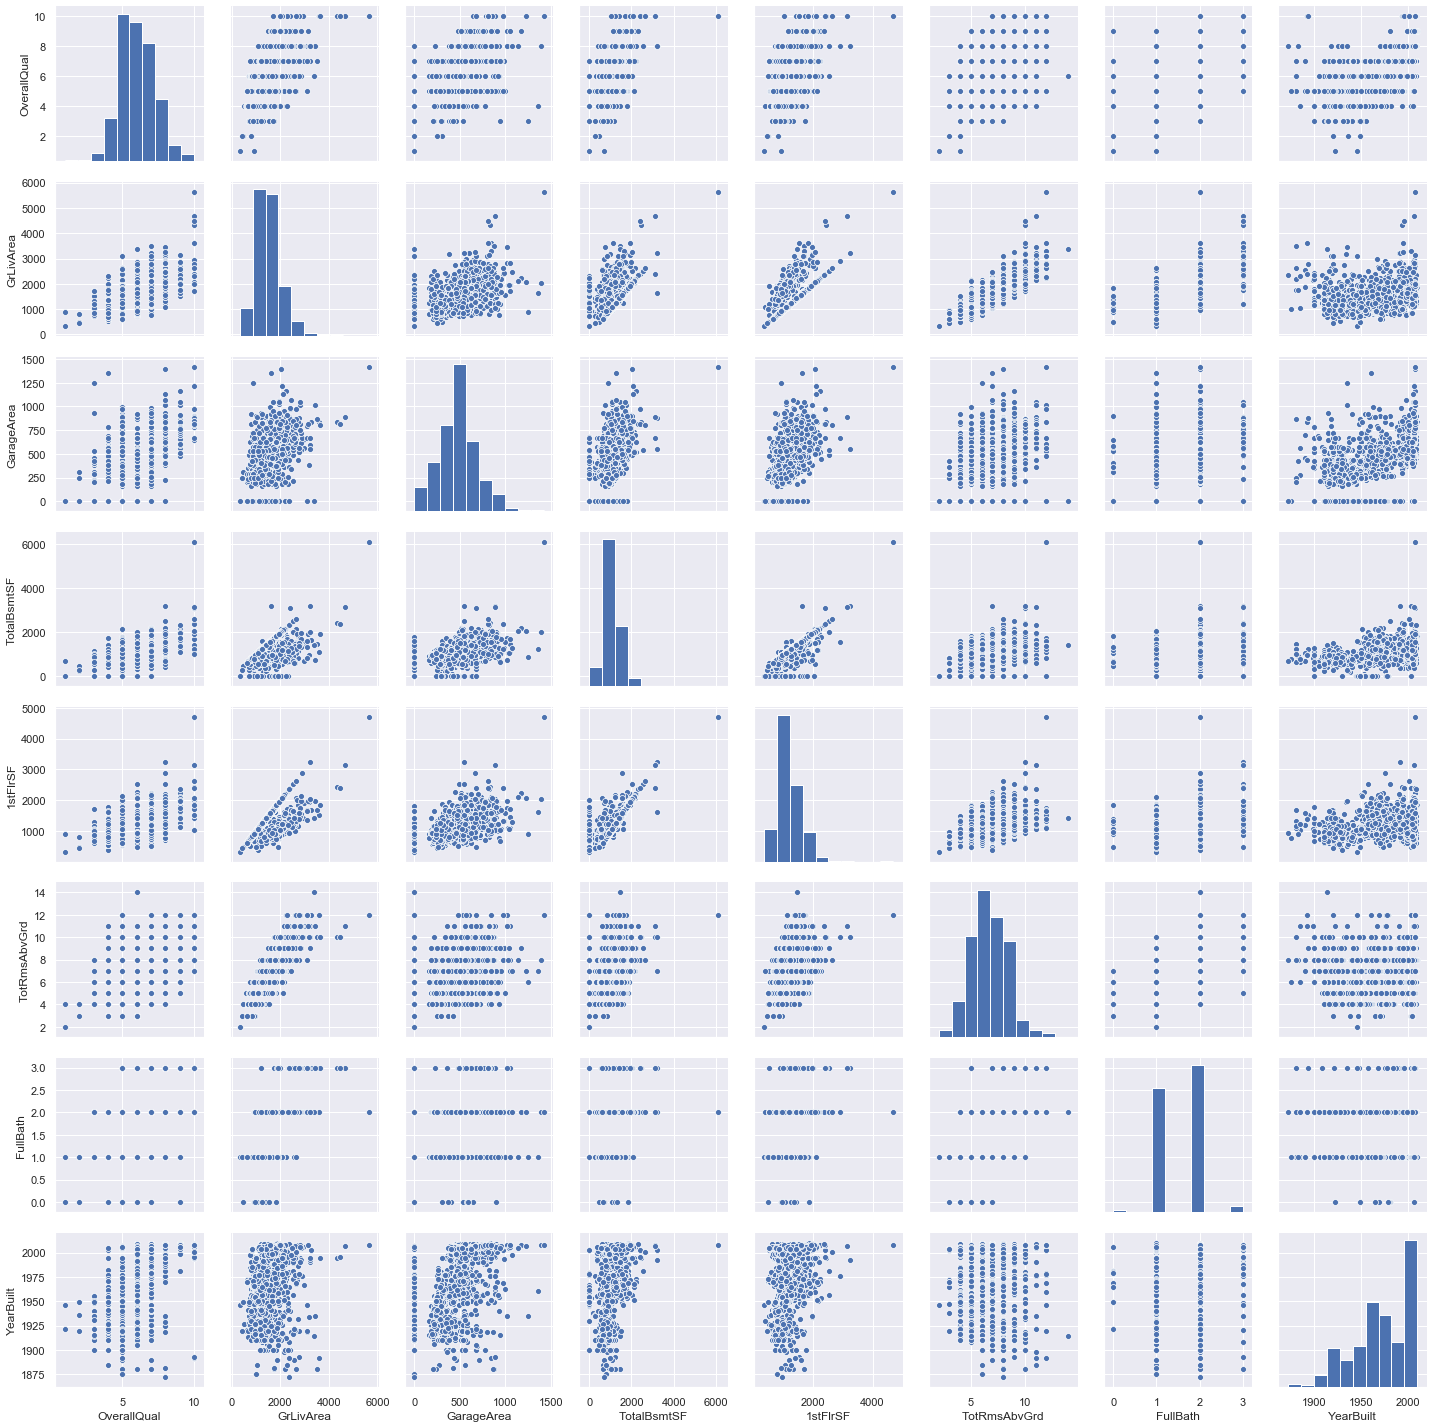

In [12]:
Spcorrcols = ['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF','TotRmsAbvGrd', 'FullBath', 'YearBuilt']
sns.pairplot(dfhousing[Spcorrcols])
plt.show()

'GrLivArea','GarageArea','TotalBsmtSF', '1stFlrSF','FullBath','YearBuilt' have a linear correlation with SalePrice. TotalBsmtSF and 1stFloor are highly correlated with each other 

# Data Cleaning and Preparation

In [13]:
dfhousing.duplicated(subset = ['Id'], keep = False).sum()

0

In [14]:
unique = dfhousing.nunique()
unique = unique[unique.values ==1]
unique

Series([], dtype: int64)

In [15]:
round(100*(dfhousing.isnull().sum()/len(dfhousing.index)),2).sort_values(ascending = False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
LotConfig         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
BsmtFinSF1        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Condition1        0.00
Neighborhood      0.00
LotShape          0.00
LandContour

In [16]:
dfhousing.PoolQC = dfhousing.PoolQC.replace(np.nan,'NA')

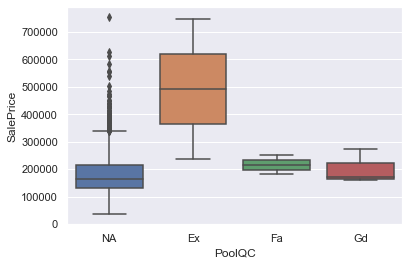

In [17]:
sns.boxplot(y = 'SalePrice', x = 'PoolQC', data = dfhousing)
plt.show()

In [18]:
dfhousing.MiscFeature = dfhousing.MiscFeature.replace(np.nan,'NA')

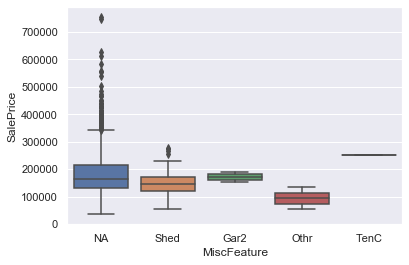

In [19]:
sns.boxplot(y = 'SalePrice',x='MiscFeature',data = dfhousing)
plt.show()

In [20]:
dfhousing.Alley = dfhousing.Alley.replace(np.nan,'NA')

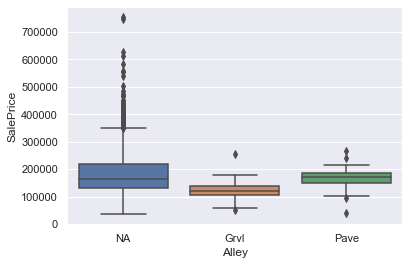

In [21]:
sns.boxplot(y = 'SalePrice',x='Alley',data = dfhousing)
plt.show()

In [22]:
dfhousing.Fence = dfhousing.Fence.replace(np.nan,'NA')

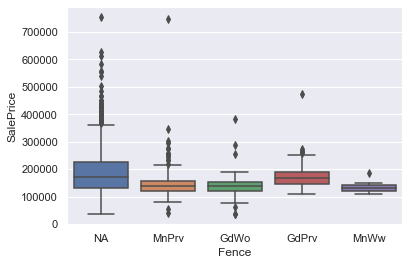

In [23]:
sns.boxplot(y = 'SalePrice',x='Fence',data = dfhousing)
plt.show()

In [24]:
dfhousing.FireplaceQu = dfhousing.FireplaceQu.replace(np.nan,'NA')

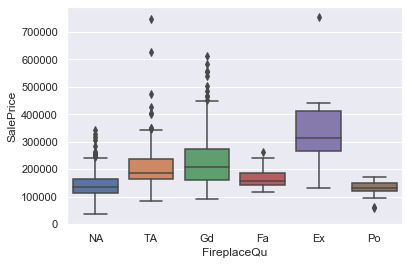

In [25]:
sns.boxplot(y = 'SalePrice',x='FireplaceQu',data = dfhousing)
plt.show()

From above boxplot we got know :
1. We dropped the column of PoolQC because of very less amount of data available.
2. The columns: MiscFeature, Alley, Fence, FireplaceQu are dropped because they dont affect the SalePrice significantly.

In [26]:
dfhousing = dfhousing.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis =1)

In [27]:
round(100*(dfhousing.isnull().sum()/len(dfhousing.index)),2).sort_values(ascending = False)

LotFrontage      17.74
GarageFinish      5.55
GarageType        5.55
GarageCond        5.55
GarageQual        5.55
GarageYrBlt       5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrType        0.55
MasVnrArea        0.55
Electrical        0.07
RoofStyle         0.00
RoofMatl          0.00
SalePrice         0.00
Exterior1st       0.00
Exterior2nd       0.00
YearBuilt         0.00
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
YearRemodAdd      0.00
BldgType          0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
Condition2        0.00
Condition1        0.00
Neighborhood      0.00
LandSlope         0.00
LotConfig         0.00
Utilities         0.00
LandContour       0.00
LotShape          0.00
Street            0.00
LotArea           0.00
MSZoning          0.00
MSSubClass        0.00
BsmtFinSF1        0.00
TotalBsmtSF       0.00
BsmtFinSF2        0.00
EnclosedPor

In [28]:
#Lot Frontage  = Linear feet of street connected to the house
dfhousing['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
82.0      12
40.0      12
43.0      12
67.0      12
57.0      12
69.0      11
76.0      11
86.0      10
53.0      10
34.0      10
92.0      10
88.0      10
62.0       9
44.0       9
84.0       9
77.0       9
35.0       9
93.0       8
61.0       8
98.0       8
96.0       8
107.0      7
120.0      7
95.0       7
58.0       7
41.0       6
30.0       6
81.0       6
89.0       6
105.0      6
48.0       6
110.0      6
94.0       6
54.0       6
91.0       6
36.0       6
47.0       5
37.0       5
83.0       5
56.0       5
87.0       5
32.0       5
42.0       4
49.0       4
102.0      4
103.0      3
108.0      3
99.0       3
104.0      3
45.0       3
130.0      3
174.0      2

In [29]:
dfhousing['LotFrontage'].isnull().sum()

259

In [30]:
dfhousing['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [31]:
dfhousing.LotFrontage = dfhousing.groupby('Neighborhood').LotFrontage.apply(lambda x: x.fillna(x.median()))

In [32]:
dfhousing['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [33]:
dfhousing['Electrical'].isnull().sum()

1

In [34]:
dfhousing = dfhousing[~(pd.isnull(dfhousing['Electrical']))]

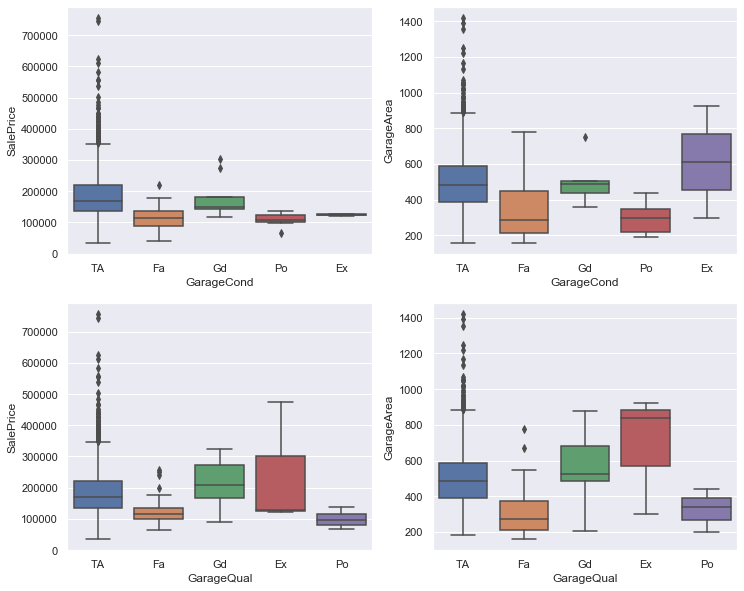

In [35]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(y='SalePrice',x='GarageCond',data = dfhousing)
plt.subplot(2,2,2)
sns.boxplot(y='GarageArea',x='GarageCond',data = dfhousing)
plt.subplot(2,2,3)
sns.boxplot(y='SalePrice',x='GarageQual',data = dfhousing)
plt.subplot(2,2,4)
sns.boxplot(y='GarageArea',x='GarageQual',data = dfhousing)
plt.show()

In [36]:
dfhousing['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    351
Name: GarageFinish, dtype: int64

In [37]:
dfhousing['GarageFinish'].isnull().sum()

81

In [38]:
dfhousing['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     87
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [39]:
dfhousing['GarageCond'].value_counts()

TA    1325
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [40]:
dfhousing['GarageQual'].value_counts()

TA    1310
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [41]:
dfhousing['GarageYrBlt'].value_counts().head(10)

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    48
1977.0    35
1998.0    31
1999.0    30
2008.0    29
1976.0    29
Name: GarageYrBlt, dtype: int64

In [42]:
dfhousing['GarageType'] = dfhousing['GarageType'].replace(np.NaN, 'NoGarage')
dfhousing['GarageYrBlt'] = dfhousing['GarageYrBlt'].replace(np.NaN, 0.0)
dfhousing['GarageFinish'] = dfhousing['GarageFinish'].replace(np.NaN, 'NoGarage')
dfhousing['GarageCond'] = dfhousing['GarageCond'].replace(np.NaN, 'NoGarage')
dfhousing['GarageQual'] = dfhousing['GarageQual'].replace(np.NaN, 'NoGarage')

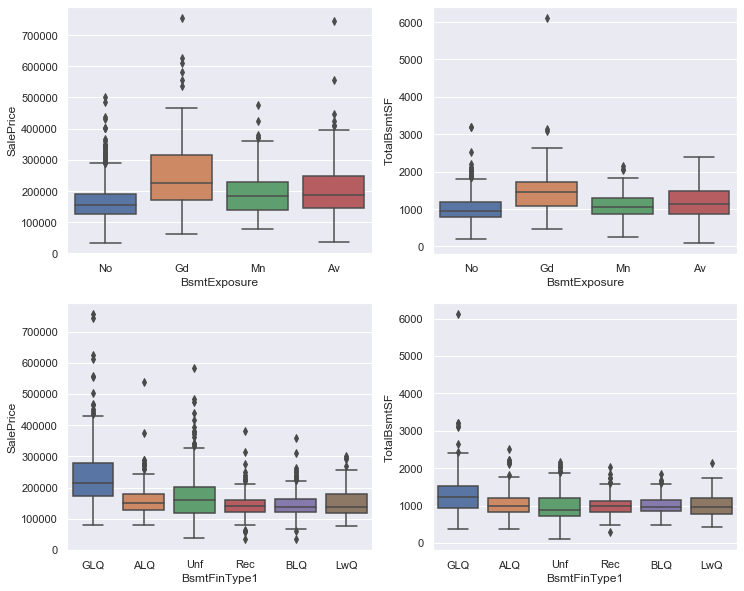

In [43]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(y='SalePrice',x='BsmtExposure',data = dfhousing)
plt.subplot(2,2,2)
sns.boxplot(y='TotalBsmtSF',x='BsmtExposure',data = dfhousing)
plt.subplot(2,2,3)
sns.boxplot(y='SalePrice',x='BsmtFinType1',data = dfhousing)
plt.subplot(2,2,4)
sns.boxplot(y='TotalBsmtSF',x='BsmtFinType1',data = dfhousing)
plt.show()

In [44]:
dfhousing['BsmtFinType2'].value_counts()

Unf    1255
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [45]:
dfhousing['BsmtExposure'].value_counts()

No    952
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [46]:
dfhousing['BsmtFinType1'].value_counts()

Unf    429
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [47]:
dfhousing['BsmtCond'].value_counts()

TA    1310
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [48]:
dfhousing['BsmtQual'].value_counts()

TA    649
Gd    617
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [49]:
dfhousing['BsmtFinType2'] = dfhousing['BsmtFinType2'].replace(np.NaN, 'NoBasement')
dfhousing['BsmtExposure'] = dfhousing['BsmtExposure'].replace(np.NaN, 'NoBasement')
dfhousing['BsmtFinType1'] = dfhousing['BsmtFinType1'].replace(np.NaN, 'NoBasement')
dfhousing['BsmtCond'] = dfhousing['BsmtCond'].replace(np.NaN, 'NoBasement')
dfhousing['BsmtQual'] = dfhousing['BsmtQual'].replace(np.NaN, 'NoBasement')

In [50]:
dfhousing['MasVnrType'].value_counts()

None       863
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [51]:
dfhousing['MasVnrArea'].value_counts().head(10)

0.0      860
72.0       8
180.0      8
108.0      8
120.0      7
16.0       7
80.0       6
200.0      6
106.0      6
340.0      6
Name: MasVnrArea, dtype: int64

In [52]:
dfhousing['MasVnrArea'] = dfhousing['MasVnrArea'].replace(np.NaN, 0.0)
dfhousing['MasVnrType'] = dfhousing['MasVnrType'].replace(np.NaN, 'None')

In [53]:
round(100*(dfhousing.isnull().sum()/len(dfhousing.index)),2).sort_values(ascending = False)

SalePrice        0.0
ExterCond        0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
Foundation       0.0
SaleCondition    0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
YearRemodAdd     0.0
YearBuilt        0.0
OverallCond      0.0
OverallQual      0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
GarageYrBlt      0.0
GarageCars       0.0
GarageArea       0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
WoodDeckSF       0.0
OpenPorchSF  

In [54]:
dfhousing.shape

(1459, 76)

In [55]:
dfhousing.set_index('Id',inplace = True)

In [56]:
dfhousing[dfhousing.YrSold < dfhousing.YearRemodAdd][['YearBuilt','YearRemodAdd','YrSold']]

,YearBuilt,YearRemodAdd,YrSold
Id,,,
524,2007,2008,2007


In [57]:
dfhousing.drop(524,inplace = True)

In [58]:
dfhousing[dfhousing.YrSold < dfhousing.YearRemodAdd][['YearBuilt','YearRemodAdd','YrSold']]

,YearBuilt,YearRemodAdd,YrSold
Id,,,


In [59]:
dfhousing['ExterQual'].value_counts()

TA    905
Gd    488
Ex     51
Fa     14
Name: ExterQual, dtype: int64

In [60]:
dfhousing['ExterQual'] = dfhousing['ExterQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
dfhousing['ExterCond'] = dfhousing['ExterCond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
dfhousing['BsmtQual'] = dfhousing['BsmtQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NoBasement':0})
dfhousing['BsmtCond'] = dfhousing['BsmtCond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NoBasement':0})
dfhousing['BsmtExposure'] = dfhousing['BsmtExposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'NoBasement':0})
dfhousing['BsmtFinType1'] = dfhousing['BsmtFinType1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NoBasement':0})
dfhousing['BsmtFinType2'] = dfhousing['BsmtFinType2'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NoBasement':0})
dfhousing['HeatingQC'] = dfhousing['HeatingQC'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
dfhousing['CentralAir'] = dfhousing['CentralAir'].map({'N':0,'Y':1})
dfhousing['KitchenQual'] = dfhousing['KitchenQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
dfhousing['GarageQual'] = dfhousing['GarageQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NoGarage':0})
dfhousing['GarageCond'] = dfhousing['GarageCond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NoGarage':0})
dfhousing['GarageFinish'] = dfhousing['GarageFinish'].map({'Fin':3,'RFn':2,'Unf':1,'NoGarage':0})

In [61]:
dfhousing['HouseAge'] =  dfhousing['YrSold'] - dfhousing['YearBuilt']

dfhousing['RemodAddAge'] = dfhousing['YrSold'] - dfhousing['YearRemodAdd']

dfhousing['GarageAge'] = dfhousing['YrSold'] - dfhousing['GarageYrBlt'] 

In [62]:
dfhousing.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'],axis = 1,inplace = True)

In [63]:
dfhousing.Utilities.value_counts()

AllPub    1457
NoSeWa       1
Name: Utilities, dtype: int64

In [64]:
dfhousing.drop('Utilities',axis = 1,inplace = True)

In [65]:
dfhousing.PoolArea.value_counts()

0      1451
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

In [66]:
dfhousing.drop('PoolArea',axis = 1,inplace = True)

In [67]:
dfhousing['3SsnPorch'].value_counts()

0      1434
168       3
216       2
144       2
180       2
245       1
238       1
290       1
196       1
182       1
407       1
304       1
162       1
153       1
320       1
140       1
130       1
96        1
23        1
508       1
Name: 3SsnPorch, dtype: int64

In [68]:
dfhousing.drop('3SsnPorch',axis = 1,inplace = True)

In [69]:
dfhousing.MiscVal.value_counts()

0        1406
400        11
500         8
700         5
450         4
2000        4
600         4
1200        2
480         2
1150        1
800         1
15500       1
620         1
3500        1
560         1
2500        1
1300        1
1400        1
350         1
8300        1
54          1
Name: MiscVal, dtype: int64

In [70]:
dfhousing.drop('MiscVal',axis = 1,inplace = True)

In [71]:
dfhousing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 1 to 1460
Data columns (total 70 columns):
MSSubClass       1458 non-null int64
MSZoning         1458 non-null object
LotFrontage      1458 non-null float64
LotArea          1458 non-null int64
Street           1458 non-null object
LotShape         1458 non-null object
LandContour      1458 non-null object
LotConfig        1458 non-null object
LandSlope        1458 non-null object
Neighborhood     1458 non-null object
Condition1       1458 non-null object
Condition2       1458 non-null object
BldgType         1458 non-null object
HouseStyle       1458 non-null object
OverallQual      1458 non-null int64
OverallCond      1458 non-null int64
RoofStyle        1458 non-null object
RoofMatl         1458 non-null object
Exterior1st      1458 non-null object
Exterior2nd      1458 non-null object
MasVnrType       1458 non-null object
MasVnrArea       1458 non-null float64
ExterQual        1458 non-null int64
ExterCond        1458 

In [72]:
cat_cols = dfhousing.select_dtypes(include = 'object').columns.tolist()

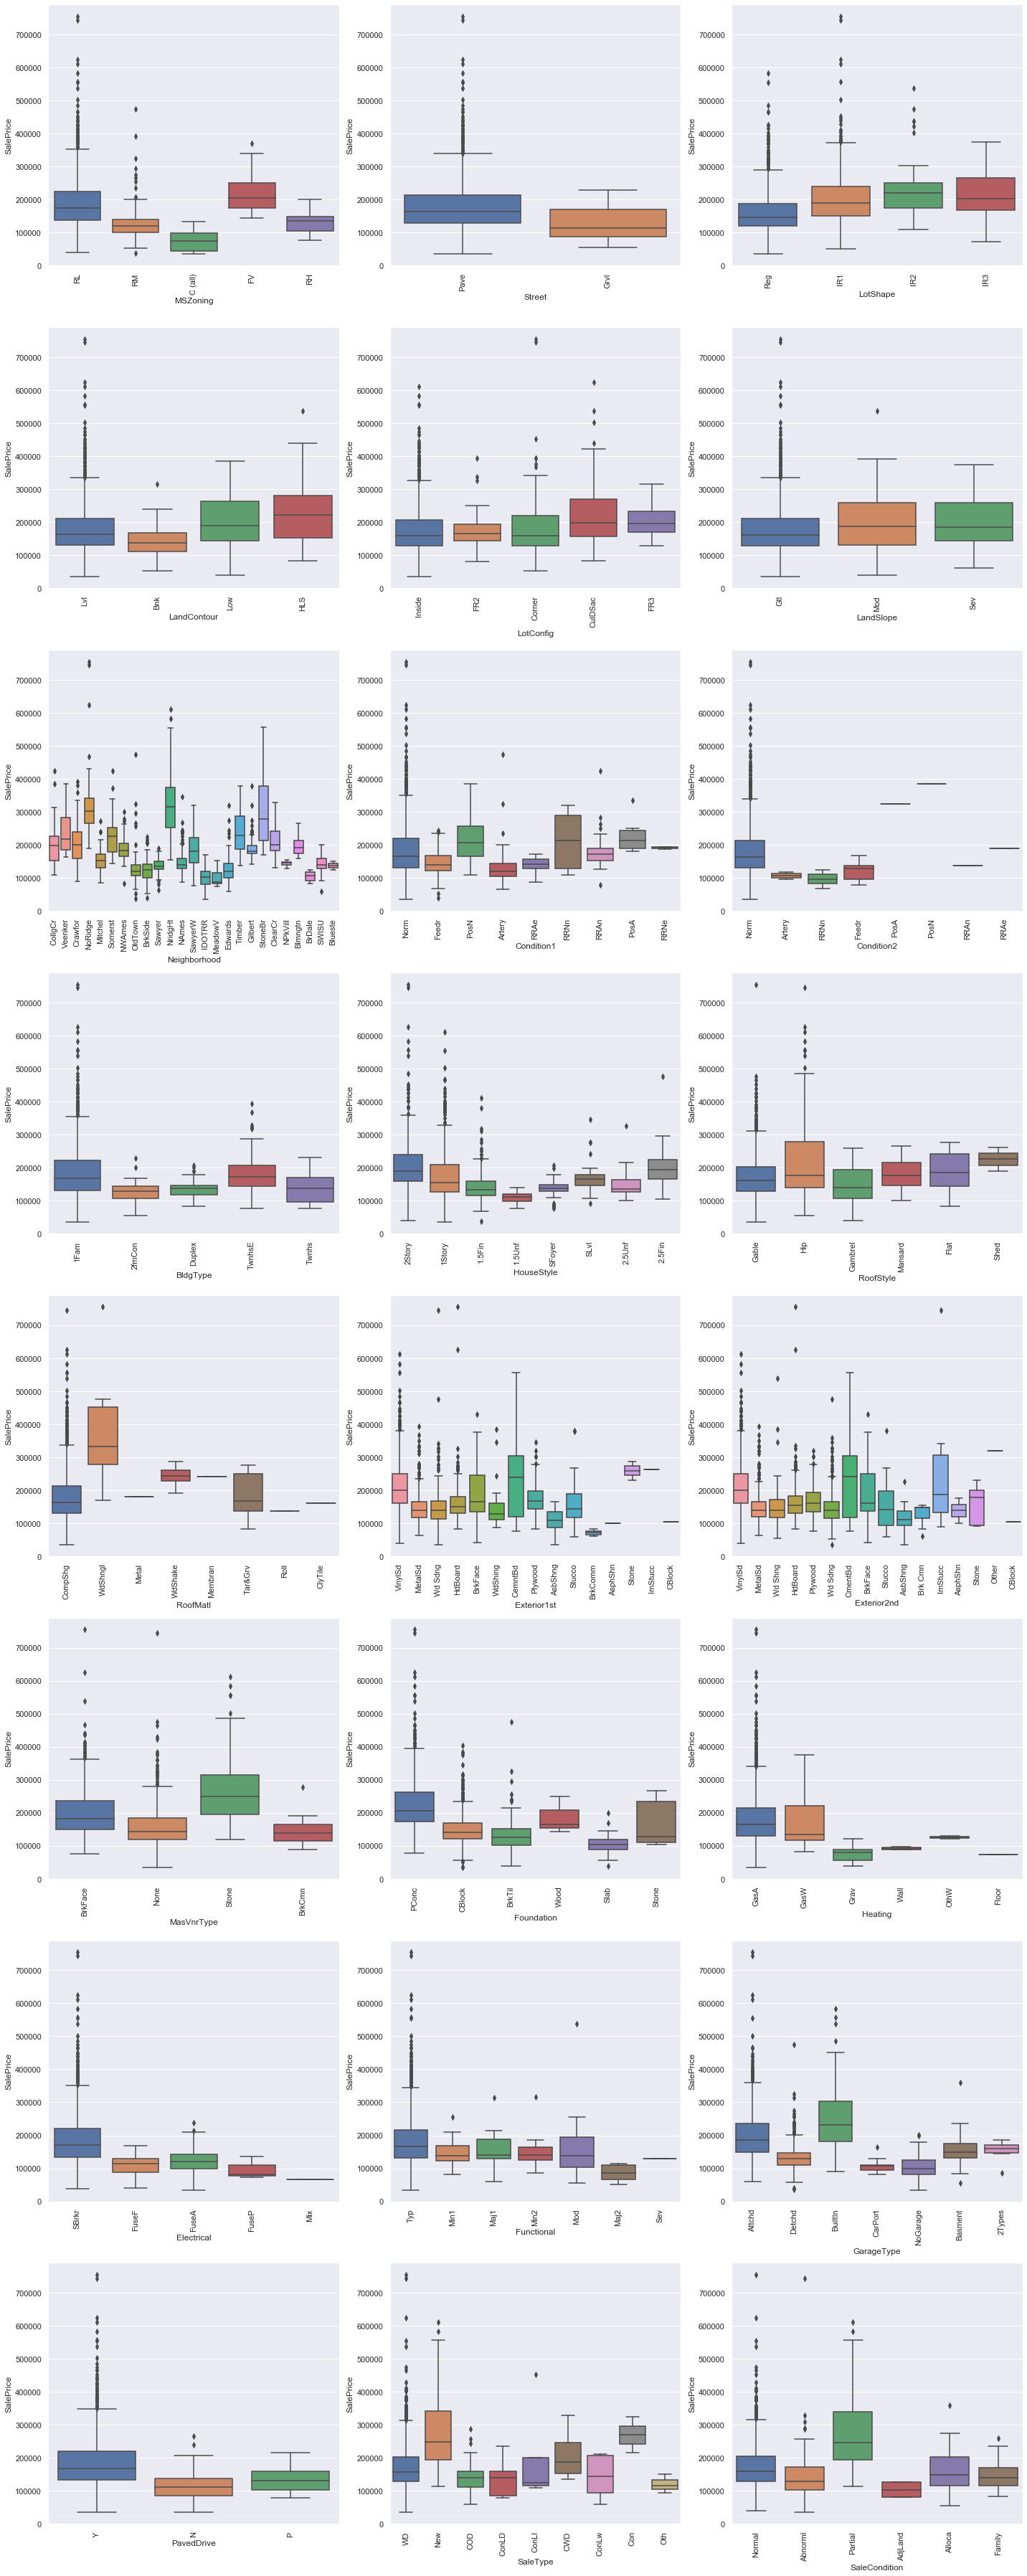

In [73]:
plt.figure(figsize = (20,50))
i = 1
for x in cat_cols:
    plt.subplot(len(cat_cols)//3,3,i)
    sns.boxplot(y='SalePrice',x=x,data=dfhousing)
    plt.xticks(rotation = 'vertical')
    i = i+1
plt.tight_layout()
plt.show()

In [74]:
num_cols = dfhousing.select_dtypes(exclude = 'object').columns.tolist()

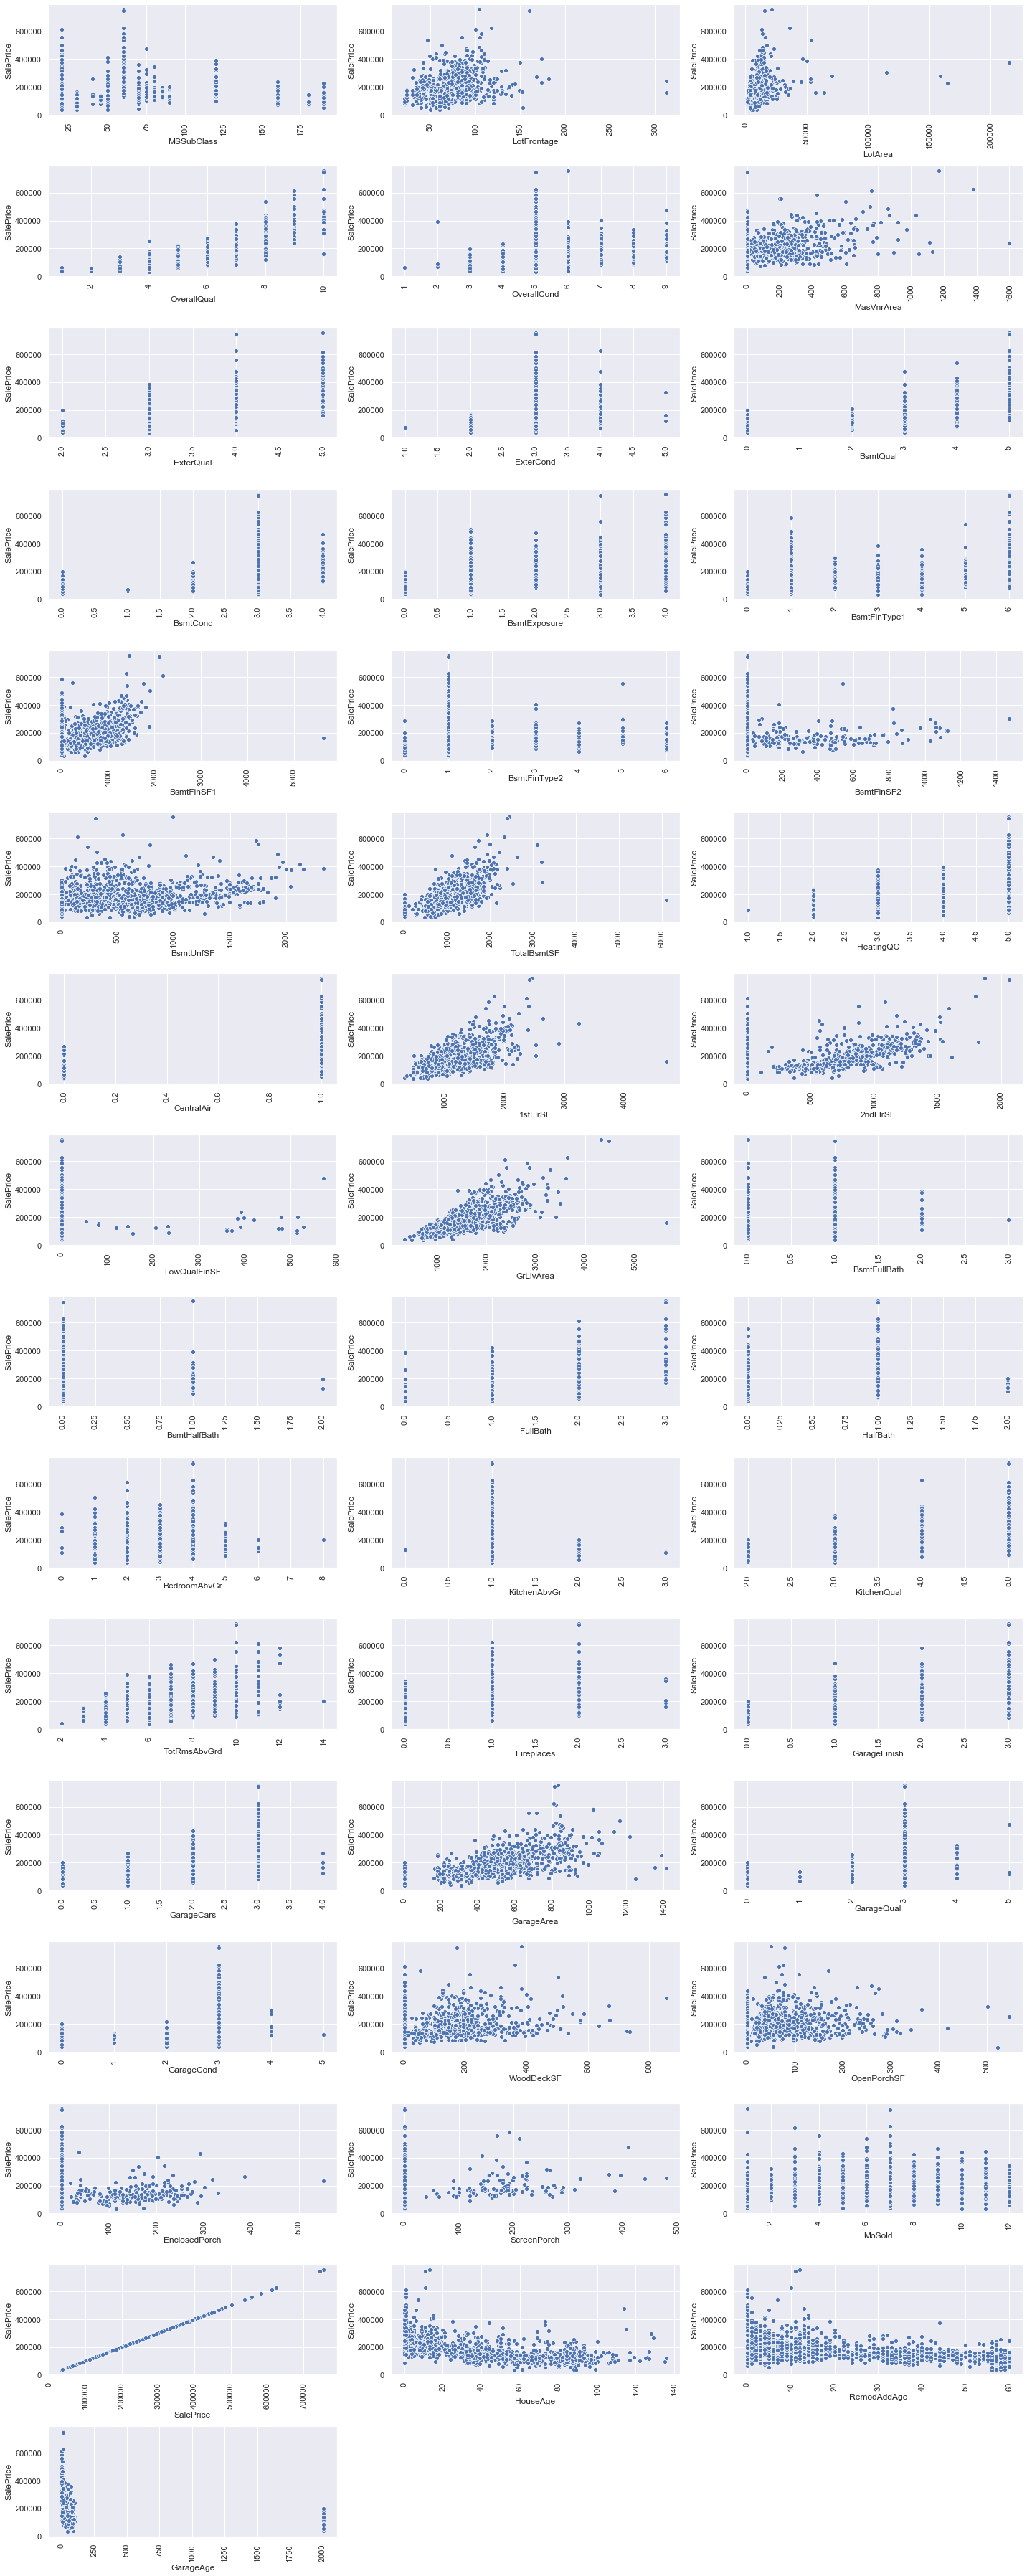

In [75]:
plt.figure(figsize = (20,50))
i = 1
for x in num_cols :
    plt.subplot(len(num_cols)//3+1,3,i)
    sns.scatterplot(y='SalePrice',x=x,data=dfhousing)
    plt.xticks(rotation = 'vertical')
    i = i+1
plt.tight_layout()
plt.show()

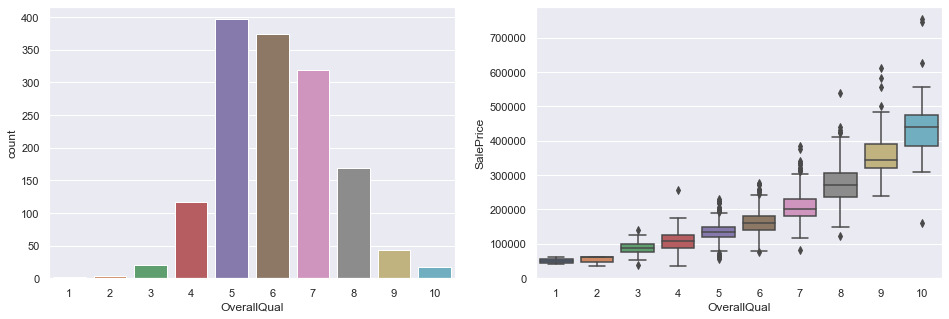

In [76]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.countplot(dfhousing.OverallQual)
plt.subplot(1,2,2)
sns.boxplot(y='SalePrice',x='OverallQual',data = dfhousing)
plt.show()

In [77]:
dfhousing.describe(percentiles = [0.05,0.10,0.25,0.50,0.75,0.90,0.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,SalePrice,HouseAge,RemodAddAge,GarageAge
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.00000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,56.879287,70.156722,10497.078189,6.097394,5.576132,102.735940,3.395062,3.083676,3.487654,2.934842,1.628944,3.545953,442.698217,1.247599,46.613169,567.152949,1056.464335,4.144719,0.934842,1161.552126,345.974623,5.852538,1513.379287,0.425240,0.057613,1.563786,0.38203,2.866255,1.046639,3.510288,6.514403,0.613169,1.713992,1.766118,472.748285,2.810014,2.808642,94.162551,46.445816,21.984225,15.081619,6.320302,180927.775034,36.596708,22.981481,139.266118
std,42.325185,22.392394,9957.970488,1.379866,1.113359,180.009066,0.573041,0.351281,0.876083,0.552532,1.066189,2.107186,453.773839,0.892898,161.420729,442.069094,435.250893,0.959890,0.246889,383.224862,435.643333,48.655960,519.267115,0.518929,0.238907,0.549891,0.50271,0.816323,0.220483,0.662945,1.622211,0.644829,0.892174,0.747104,213.671713,0.723360,0.720144,125.389262,65.618007,61.155666,55.792877,2.703542,79496.167760,30.242180,20.637248,453.996251
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000,0.000000,0.000000
5%,20.000000,35.000000,3303.100000,4.000000,4.000000,0.000000,3.000000,3.000000,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,520.000000,3.000000,0.000000,672.850000,0.000000,0.000000,848.000000,0.000000,0.000000,1.000000,0.00000,2.000000,1.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,88000.000000,1.000000,0.000000,0.000000
10%,20.000000,48.000000,5000.000000,5.000000,5.000000,0.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,74.700000,637.000000,3.000000,1.000000,757.000000,0.000000,0.000000,912.000000,0.000000,0.000000,1.000000,0.00000,2.000000,1.000000,3.000000,5.000000,0.000000,1.000000,1.000000,240.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,3.000000,106425.000000,1.000000,1.000000,1.000000
25%,20.000000,60.000000,7544.500000,5.000000,5.000000,0.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,223.000000,796.000000,3.000000,1.000000,882.000000,0.000000,0.000000,1128.500000,0.000000,0.000000,1.000000,0.00000,2.000000,1.000000,3.000000,5.000000,0.000000,1.000000,1.000000,331.500000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,5.000000,129925.000000,8.000000,4.000000,7.000000
50%,50.000000,70.000000,9475.000000,6.000000,5.000000,0.000000,3.000000,3.000000,4.000000,3.000000,1.000000,4.000000,383.500000,1.000000,0.000000,477.500000,991.500000,5.000000,1.000000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.00000,3.000000,1.000000,3.0000

In [78]:
q3 = dfhousing['LotArea'].quantile(0.99)
dfhousing = dfhousing[dfhousing.LotArea <= q3]

In [79]:
q3 = dfhousing['MasVnrArea'].quantile(0.99)
dfhousing = dfhousing[dfhousing.MasVnrArea <= q3]

In [80]:
dfhousing.shape

(1428, 70)

In [81]:
dfhousing.describe(percentiles = [0.05,0.10,0.25,0.50,0.75,0.90,0.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,SalePrice,HouseAge,RemodAddAge,GarageAge
count,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000
mean,56.890756,69.773459,9715.230392,6.070028,5.579132,91.668067,3.385854,3.083333,3.474090,2.932773,1.602941,3.527311,431.394958,1.240896,45.721289,566.266106,1043.382353,4.140056,0.933473,1150.614146,339.923669,5.975490,1496.513305,0.418768,0.056723,1.554622,0.378852,2.862045,1.047619,3.501401,6.487395,0.595938,1.701681,1.752101,468.556022,2.806723,2.804622,91.254202,46.177871,22.385154,14.990196,6.323529,177963.313725,36.850140,23.149160,141.690476
std,42.317210,21.354689,4109.895792,1.356806,1.118757,149.413229,0.563049,0.352271,0.874798,0.557516,1.044848,2.108137,425.609983,0.883205,159.191645,439.619953,407.757196,0.960316,0.249288,365.580074,429.134073,49.157272,493.053635,0.513024,0.237373,0.542994,0.502301,0.812405,0.222683,0.657551,1.601238,0.633041,0.888656,0.745105,211.027885,0.730099,0.727134,121.249951,65.454750,61.711346,55.731335,2.705665,74883.956343,30.316133,20.687064,458.420020
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000,0.000000,0.000000
5%,20.000000,35.000000,3332.450000,4.000000,4.000000,0.000000,3.000000,3.000000,2.350000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,510.900000,3.000000,0.000000,672.000000,0.000000,0.000000,848.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,88000.000000,1.000000,0.000000,0.000000
10%,20.000000,48.000000,5000.000000,5.000000,5.000000,0.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,73.400000,630.000000,3.000000,1.000000,756.700000,0.000000,0.000000,909.100000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,5.000000,0.000000,1.000000,1.000000,240.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,3.000000,106000.000000,1.000000,1.000000,1.000000
25%,20.000000,60.000000,7500.000000,5.000000,5.000000,0.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,220.750000,793.750000,3.000000,1.000000,879.750000,0.000000,0.000000,1125.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,5.000000,0.000000,1.000000,1.000000,321.500000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,5.000000,129375.000000,8.000000,4.000000,7.000000
50%,50.000000,70.000000,9378.500000,6.000000,5.000000,0.000000,3.000000,3.000000,3.000000,3.000000,1.000000,4.000000,378.000000,1.000000,0.000000,481.500000,984.500000,5.000000,1.000000,1080.000000,0.000000,0.000000,1456.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,

In [82]:
from scipy.stats import norm
from scipy.stats import probplot

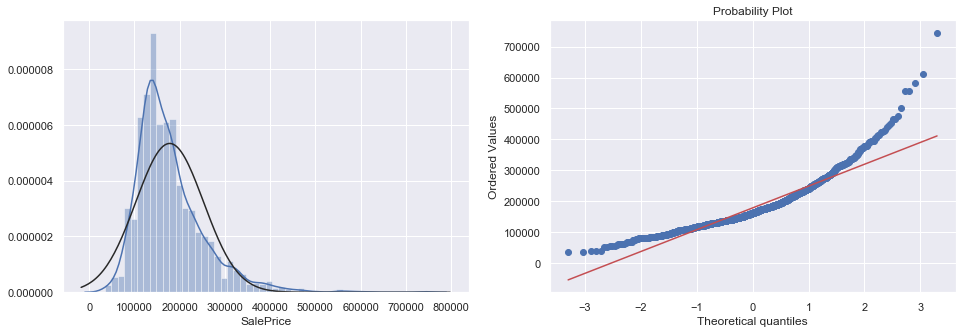

In [83]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.distplot(dfhousing.SalePrice,fit=norm)
plt.subplot(1,2,2)
probplot(dfhousing.SalePrice,plot = plt)
plt.show()

In [84]:
print('Skewness:',dfhousing.SalePrice.skew())
print('Kurtosis:',dfhousing.SalePrice.kurt())

Skewness: 1.6841564818792483
Kurtosis: 5.328531272090053


In [85]:
dfhousing['SalePrice'] = np.log(dfhousing['SalePrice'])

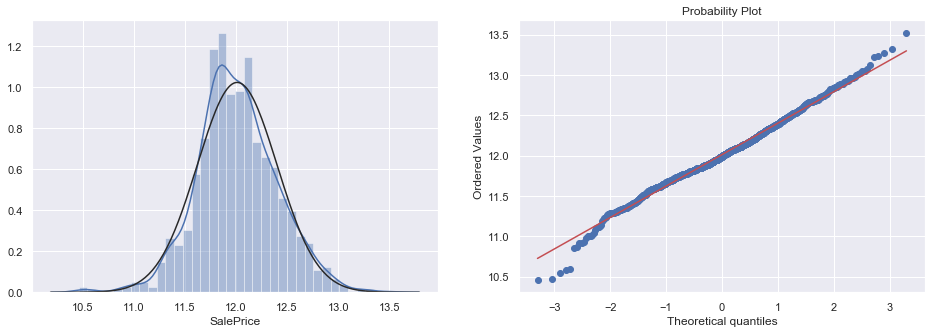

In [86]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.distplot(dfhousing.SalePrice,fit=norm)
plt.subplot(1,2,2)
probplot(dfhousing.SalePrice,plot = plt)
plt.show()

In [87]:
dfhousing.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'SaleType', 'SaleCondition', 'SalePrice', 'HouseAge', 'RemodAddAge', 'GarageAge'], dtype='object')

In [88]:
X = dfhousing.loc[:, ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch', 'MoSold', 'SaleType', 'SaleCondition',
       'HouseAge', 'RemodAddAge', 'GarageAge']]

y = dfhousing['SalePrice']

In [89]:
housing_cat = X.select_dtypes(include=['object'])
housing_cat.head()

,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,Functional,GarageType,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
2,RL,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
3,RL,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
4,RL,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,GasA,SBrkr,Typ,Detchd,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,Attchd,Y,WD,Normal


In [90]:
housing_dum = pd.get_dummies(housing_cat, drop_first=True)
housing_dum.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
5,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [91]:
X = X.drop(list(housing_cat.columns), axis=1)

In [92]:
X = pd.concat([X, housing_dum], axis=1)

In [93]:
X.shape

(1428, 194)

In [94]:
from sklearn.preprocessing import scale

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial'], dtype='object', length=194)

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size = 0.3, random_state=100)

# Model Building and Evaluation

In [96]:
lm = LinearRegression()

In [97]:
rfe = RFE(lm, 50)            
rfe = rfe.fit(X_train, y_train)

In [98]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 103),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 140),
 ('ExterQual', False, 73),
 ('ExterCond', False, 47),
 ('BsmtQual', False, 108),
 ('BsmtCond', False, 109),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', False, 61),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 63),
 ('BsmtFinSF2', False, 15),
 ('BsmtUnfSF', False, 21),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', True, 1),
 ('CentralAir', False, 48),
 ('1stFlrSF', False, 18),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 19),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 114),
 ('FullBath', False, 117),
 ('HalfBath', False, 39),
 ('BedroomAbvGr', False, 141),
 ('KitchenAbvGr', True, 1),
 ('KitchenQual', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', True, 1),
 ('GarageFinish', False, 126),
 ('GarageCars', True, 1),
 ('GarageArea', False, 11),
 ('GarageQual', True, 1),
 ('GarageCond

In [99]:
col50 = X_train.columns[rfe.support_]
col50

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtExposure', 'BsmtFinSF1', 'TotalBsmtSF', 'HeatingQC', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageQual', 'ScreenPorch', 'HouseAge', 'RemodAddAge', 'GarageAge', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_BrkSide', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Condition1_Norm', 'BldgType_Twnhs', 'HouseStyle_2.5Fin', 'HouseStyle_2Story', 'Exterior1st_BrkFace', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'Foundation_PConc', 'Foundation_Slab', 'Functional_Min1', 'Functional_Min2', 'Functional_Typ', 'GarageType_Attchd', 'GarageType_Detchd', 'GarageType_NoGarage', 'SaleType_New', 'SaleType_WD', 'SaleCondition_Normal', 'SaleCondition_Partial'], dtype='object')

### Ridge Regression

In [100]:
X_train_final = X_train[col50]

In [101]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 
                    5.0, 6.0, 7.0, 8.0, 9.0, 10.0,20, 50, 100, 500, 1000]}
ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'neg_mean_absolute_error', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_final, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [104]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 20}
-0.07648264587719697


In [105]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=20]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.075697,0.142407,0.002398,0.000801,0.0001,{'alpha': 0.0001},-0.072792,-0.082160,-0.085098,-0.070408,-0.075434,-0.077180,0.005582,25,-0.072051,-0.069568,-0.069509,-0.072565,-0.071142,-0.070967,0.001252
1,0.002998,0.000893,0.001562,0.000828,0.001,{'alpha': 0.001},-0.072793,-0.082154,-0.085097,-0.070409,-0.075434,-0.077179,0.005580,24,-0.072050,-0.069569,-0.069509,-0.072564,-0.071142,-0.070967,0.001252
2,0.000000,0.000000,0.003125,0.006250,0.01,{'alpha': 0.01},-0.072806,-0.082094,-0.085083,-0.070419,-0.075435,-0.077169,0.005561,23,-0.072042,-0.069575,-0.069514,-0.072562,-0.071145,-0.070968,0.001247
3,0.003125,0.006250,0.000000,0.000000,0.05,{'alpha': 0.05},-0.072856,-0.081881,-0.085032,-0.070458,-0.075437,-0.077134,0.005492,22,-0.072016,-0.069601,-0.069535,-0.072552,-0.071155,-0.070972,0.001230
4,0.003125,0.006249,0.000000,0.000000,0.1,{'alpha': 0.1},-0.072901,-0.081728,-0.084979,-0.070496,-0.075441,-0.077110,0.005434,21,-0.071994,-0.069634,-0.069554,-0.072547,-0.071166,-0.070979,0.001213


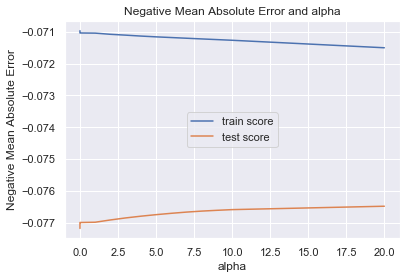

In [106]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')


plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='center')
plt.show()

In [107]:
alpha = 9
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_final, y_train)
ridge.coef_

array([ 0.01004655,  0.01924372,  0.06478816,  0.0471687 ,  0.01635   ,
        0.02362837,  0.05330915,  0.01075565,  0.02121356,  0.11442307,
        0.01839706, -0.01963348,  0.01338964,  0.02113072,  0.01597201,
        0.02957206,  0.02265233,  0.01362222, -0.06898712, -0.01391505,
       -0.00018879,  0.04607331,  0.02177086,  0.06590325,  0.03713372,
        0.01595776,  0.02466583, -0.00560242,  0.01562657,  0.01148091,
        0.01150683, -0.01037911, -0.00661901, -0.01014325,  0.01699981,
        0.01413022,  0.0126568 ,  0.01700271,  0.02282599,  0.01055906,
        0.01830921,  0.01357745,  0.03575461,  0.01478078,  0.00991101,
        0.01489271,  0.0451594 , -0.00975307,  0.03212605, -0.01888155])

In [108]:
Y_train_ridge = y_train.copy()

In [109]:
from sklearn.metrics import r2_score
model_ridge=ridge.fit(X_train_final, Y_train_ridge)

y_train_pred = ridge.predict(X_train_final)
print(model_ridge.score(X_train_final, Y_train_ridge))
print(r2_score(y_true=Y_train_ridge, y_pred=y_train_pred))

0.9344883914735712
0.9344883914735712


In [110]:
X_test_ridge = X_test[col50]
Y_test_ridge = y_test.copy()

In [111]:
y_test_pred = ridge.predict(X_test_ridge)
print(model_ridge.score(X_test_ridge, Y_test_ridge))
print(r2_score(y_true=Y_test_ridge, y_pred=y_test_pred))

0.9070902187222167
0.9070902187222167


Train is 93.44% and test is 90.70%

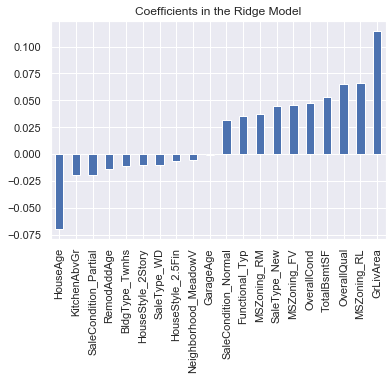

In [112]:
coefs = pd.Series(ridge.coef_, index = X_train_final.columns)

imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "bar")
plt.title("Coefficients in the Ridge Model")

plt.show()

In [113]:
coefs.sort_values().head(20)

HouseAge                -0.068987
KitchenAbvGr            -0.019633
SaleCondition_Partial   -0.018882
RemodAddAge             -0.013915
BldgType_Twnhs          -0.010379
HouseStyle_2Story       -0.010143
SaleType_WD             -0.009753
HouseStyle_2.5Fin       -0.006619
Neighborhood_MeadowV    -0.005602
GarageAge               -0.000189
GarageType_Detchd        0.009911
LotFrontage              0.010047
Foundation_Slab          0.010559
HeatingQC                0.010756
Neighborhood_StoneBr     0.011481
Condition1_Norm          0.011507
MasVnrType_None          0.012657
KitchenQual              0.013390
Functional_Min2          0.013577
ScreenPorch              0.013622
dtype: float64

In [114]:
coefs.sort_values().tail(20)

BsmtFullBath            0.018397
LotArea                 0.019244
TotRmsAbvGrd            0.021131
2ndFlrSF                0.021214
MSZoning_RH             0.021771
GarageQual              0.022652
Foundation_PConc        0.022826
BsmtFinSF1              0.023628
Neighborhood_Crawfor    0.024666
GarageCars              0.029572
SaleCondition_Normal    0.032126
Functional_Typ          0.035755
MSZoning_RM             0.037134
SaleType_New            0.045159
MSZoning_FV             0.046073
OverallCond             0.047169
TotalBsmtSF             0.053309
OverallQual             0.064788
MSZoning_RL             0.065903
GrLivArea               0.114423
dtype: float64

In [115]:
ridge_df = pd.DataFrame() 
ridge_df['Coeff Values'] = pd.Series(ridge.coef_) 
ridge_df['Variables'] = X_train_final.columns

ridge_df = ridge_df.loc[ridge_df['Coeff Values']!=0]

ridge_df['Absolute Coefficent'] =ridge_df['Coeff Values'].apply(lambda x:abs(x))
ridge_df.sort_values(by=['Absolute Coefficent'],inplace=True,ascending=False)

ridge_df.head(20)

,Coeff Values,Variables,Absolute Coefficent
9,0.114423,GrLivArea,0.114423
18,-0.068987,HouseAge,0.068987
23,0.065903,MSZoning_RL,0.065903
2,0.064788,OverallQual,0.064788
6,0.053309,TotalBsmtSF,0.053309
3,0.047169,OverallCond,0.047169
21,0.046073,MSZoning_FV,0.046073
46,0.045159,SaleType_New,0.045159
24,0.037134,MSZoning_RM,0.037134
42,0.035755,Functional_Typ,0.035755


As per Ridge regression, top 5 variables which effect the price of houses are:

Positive (increases the price):
    
- BsmtFullBath           
- LotArea               
- TotRmsAbvGrd            
- 2ndFlrSF                
- MSZoning_RH            
    
Negative (decreases the price):
    
- HouseAge              
- KitchenAbvGr            
- SaleCondition_Partial   
- RemodAddAge            
- BldgType_Twnhs         

### Lasso Regression

In [116]:
X_train_lasso = X_train[col50]

In [117]:
lasso = Lasso()
folds = 10

params = {'alpha': [0.0001, 0.001,0.002,0.003,0.005,0.008]}

model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_lasso, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.0s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.002, 0.003, 0.005, 0.008]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [120]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.001}
-0.07671801798181328


In [121]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.043075,0.073364,0.002100,0.001044,0.0001,{'alpha': 0.0001},-0.063223,-0.081834,-0.087900,-0.078341,-0.070458,-0.096314,-0.063987,-0.076599,-0.075224,-0.076319,-0.077021,0.009611,3,-0.072751,-0.070851,-0.070530,-0.071115,-0.072243,-0.069481,-0.073114,-0.071092,-0.071599,-0.071369,-0.071415,0.001021
1,0.005608,0.002220,0.001100,0.000539,0.001,{'alpha': 0.001},-0.063909,-0.078182,-0.089473,-0.077351,-0.066382,-0.094399,-0.065019,-0.077996,-0.076073,-0.078413,-0.076718,0.009441,1,-0.073274,-0.071716,-0.070665,-0.071754,-0.073309,-0.070345,-0.073579,-0.071752,-0.072102,-0.071780,-0.072028,0.001030
2,0.007322,0.005671,0.000900,0.000943,0.002,{'alpha': 0.002},-0.064243,-0.077097,-0.088589,-0.076479,-0.066876,-0.095162,-0.065469,-0.079138,-0.075921,-0.079730,-0.076868,0.009362,2,-0.073513,-0.072287,-0.070935,-0.072244,-0.073634,-0.070907,-0.073923,-0.072148,-0.072426,-0.072044,-0.072406,0.000984
3,0.009094,0.002469,0.002299,0.000901,0.003,{'alpha': 0.003},-0.064615,-0.077334,-0.088428,-0.076682,-0.068234,-0.096232,-0.065932,-0.080162,-0.076133,-0.081531,-0.077524,0.009395,4,-0.074061,-0.072758,-0.071689,-0.072881,-0.074135,-0.071482,-0.074443,-0.072759,-0.072923,-0.072620,-0.072975,0.000938
4,0.006123,0.005434,0.001409,0.001432,0.005,{'alpha': 0.005},-0.066000,-0.077474,-0.087172,-0.078388,-0.069787,-0.097642,-0.065878,-0.081668,-0.076389,-0.084415,-0.078475,0.009403,5,-0.075754,-0.074495,-0.073249,-0.074427,-0.075362,-0.072663,-0.075827,-0.074387,-0.074351,-0.074093,-0.074461,0.000960


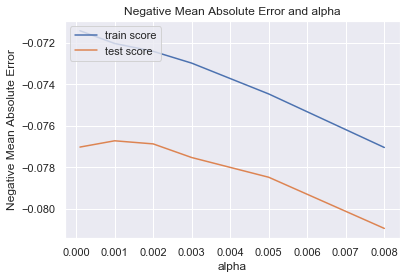

In [122]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')


plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [123]:
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_lasso, y_train) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [124]:
(lasso.coef_)

array([ 0.00882185,  0.01707476,  0.06851598,  0.04890318,  0.01524115,
        0.0232514 ,  0.04660384,  0.00995102,  0.00137714,  0.13099348,
        0.01805097, -0.01826785,  0.01290536,  0.01639145,  0.01487969,
        0.02838147,  0.0123944 ,  0.01257338, -0.07146498, -0.01049945,
        0.        ,  0.02388287,  0.00977508,  0.02437213,  0.        ,
        0.01529727,  0.02349021, -0.00567449,  0.01468944,  0.00972186,
        0.01041091, -0.01056841, -0.00442322, -0.00095149,  0.01520932,
        0.00042369, -0.        ,  0.00810365,  0.02187412,  0.00724042,
        0.01438369,  0.00968152,  0.03200537,  0.00706237,  0.00201143,
        0.        ,  0.03082982, -0.00456695,  0.03170906, -0.        ])

In [125]:
list(zip(X_train_lasso.columns,lasso.coef_))

[('LotFrontage', 0.008821852901836874),
 ('LotArea', 0.01707476467393106),
 ('OverallQual', 0.06851597881242355),
 ('OverallCond', 0.04890317792034476),
 ('BsmtExposure', 0.015241154246473874),
 ('BsmtFinSF1', 0.02325140104948903),
 ('TotalBsmtSF', 0.04660384147306942),
 ('HeatingQC', 0.009951017233397462),
 ('2ndFlrSF', 0.0013771415270706566),
 ('GrLivArea', 0.1309934798922374),
 ('BsmtFullBath', 0.018050972083191202),
 ('KitchenAbvGr', -0.01826785332435803),
 ('KitchenQual', 0.012905362071784963),
 ('TotRmsAbvGrd', 0.016391447940030338),
 ('Fireplaces', 0.014879693798864186),
 ('GarageCars', 0.028381474055649277),
 ('GarageQual', 0.012394395145565739),
 ('ScreenPorch', 0.012573384570358151),
 ('HouseAge', -0.0714649819368319),
 ('RemodAddAge', -0.010499449583010542),
 ('GarageAge', 0.0),
 ('MSZoning_FV', 0.023882865382799802),
 ('MSZoning_RH', 0.00977507728193221),
 ('MSZoning_RL', 0.024372126339221593),
 ('MSZoning_RM', 0.0),
 ('Neighborhood_BrkSide', 0.015297271150869757),
 ('Neigh

In [126]:
Y_train_lasso = y_train.copy()
model_lasso=lasso.fit(X_train_lasso, Y_train_lasso)

y_train_pred = lasso.predict(X_train_lasso)
print(model_lasso.score(X_train_lasso, Y_train_lasso))
print(r2_score(y_true=Y_train_lasso, y_pred=y_train_pred))

0.9326482297898385
0.9326482297898384


In [127]:
X_test_lasso = X_test[col50]
Y_test_lasso = y_test.copy()
y_test_pred = lasso.predict(X_test_lasso)
print(model_lasso.score(X_test_lasso, Y_test_lasso))
print(r2_score(y_true=Y_test_lasso, y_pred=y_test_pred))

0.9040569121424579
0.9040569121424579


Train is 93.26% and test is 90.40%

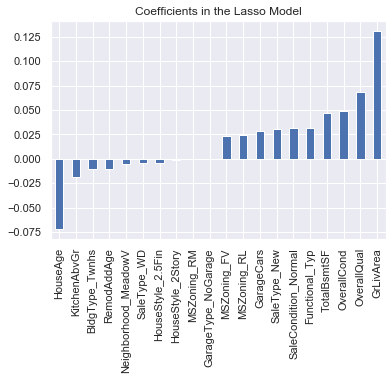

In [128]:
coefs = pd.Series(lasso.coef_, index = X_train_lasso.columns)

imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "bar")
plt.title("Coefficients in the Lasso Model")

plt.show()

In [129]:
lasso_df = pd.DataFrame() 
lasso_df['Coeff Values'] = pd.Series(lasso.coef_) 
lasso_df['Variables'] = X_train_lasso.columns

lasso_df = lasso_df.loc[lasso_df['Coeff Values']!=0]

lasso_df['Absolute Coefficent'] =lasso_df['Coeff Values'].apply(lambda x:abs(x))
lasso_df.sort_values(by=['Absolute Coefficent'],inplace=True,ascending=False)

lasso_df.head(20)

,Coeff Values,Variables,Absolute Coefficent
9,0.130993,GrLivArea,0.130993
18,-0.071465,HouseAge,0.071465
2,0.068516,OverallQual,0.068516
3,0.048903,OverallCond,0.048903
6,0.046604,TotalBsmtSF,0.046604
42,0.032005,Functional_Typ,0.032005
48,0.031709,SaleCondition_Normal,0.031709
46,0.030830,SaleType_New,0.030830
15,0.028381,GarageCars,0.028381
23,0.024372,MSZoning_RL,0.024372


In [130]:
coefs.sort_values().head(20)

HouseAge                -0.071465
KitchenAbvGr            -0.018268
BldgType_Twnhs          -0.010568
RemodAddAge             -0.010499
Neighborhood_MeadowV    -0.005674
SaleType_WD             -0.004567
HouseStyle_2.5Fin       -0.004423
HouseStyle_2Story       -0.000951
MSZoning_RM              0.000000
GarageType_NoGarage      0.000000
MasVnrType_None         -0.000000
GarageAge                0.000000
SaleCondition_Partial   -0.000000
MasVnrType_BrkFace       0.000424
2ndFlrSF                 0.001377
GarageType_Detchd        0.002011
GarageType_Attchd        0.007062
Foundation_Slab          0.007240
MasVnrType_Stone         0.008104
LotFrontage              0.008822
dtype: float64

In [131]:
coefs.sort_values().tail(20)

Fireplaces              0.014880
Exterior1st_BrkFace     0.015209
BsmtExposure            0.015241
Neighborhood_BrkSide    0.015297
TotRmsAbvGrd            0.016391
LotArea                 0.017075
BsmtFullBath            0.018051
Foundation_PConc        0.021874
BsmtFinSF1              0.023251
Neighborhood_Crawfor    0.023490
MSZoning_FV             0.023883
MSZoning_RL             0.024372
GarageCars              0.028381
SaleType_New            0.030830
SaleCondition_Normal    0.031709
Functional_Typ          0.032005
TotalBsmtSF             0.046604
OverallCond             0.048903
OverallQual             0.068516
GrLivArea               0.130993
dtype: float64

As per Lasso regression top 5 variables which effect the price of houses are:

Positive(increases the price):

- Fireplaces            
- Exterior1st_BrkFace     
- BsmtExposure            
- Neighborhood_BrkSide    
- TotRmsAbvGrd          

Negative(decreases the price):

- HouseAge                
- KitchenAbvGr            
- BldgType_Twnhs          
- RemodAddAge             
- Neighborhood_MeadowV    


## Comparison of Ridge and Lasso

**Comparsion between lasso and ridge regression model:**

- Negative affect variables have remained the same overall. The only changes are : Neighborhood_MeadowV(Lasso) & SaleCondition_Partial(Ridge)

- There are changes in positive affect variables (top5- as per co-efficient):

**Lasso variables(Positive):**

- Fireplaces            
- Exterior1st_BrkFace     
- BsmtExposure            
- Neighborhood_BrkSide    
- TotRmsAbvGrd 



**Ridge variables:**

- BsmtFullBath
- LotArea
- TotRmsAbvGrd
- 2ndFlrSF
- MSZoning_RH



